# Introduction

Hello, I continue to learn from where I left off with this project. In this project, I prepared this project for learning what is the Transfer Learning and how to use two models of deep learning. The models are VGG16 and VGG19. Firstly, I prepared the dataset for models and visualized a few images in the dataset. After I prepared the dataset, I created the models with Keras. After I created the models, I applied the models to the dataset. After I applied the models, I visualized the results of the models. In general, the steps of this work are as follows.

As I mentioned before, I am currently on a learning path. In this learning path, I am improving myself on the topics of deep learning and I realise many projects while learning. I will share projects I have done in this chapter. In this learning path, I would be very happy if you would examine my project and help me with how to improve my project or what I should do in this development path. I wish you a good day and good work.

[For a detailed description of the dataset, please click here](https://www.kaggle.com/datasets/puneet6060/intel-image-classification)

My projects about Deep Learning:<br>
- [Gender Prediction With Logistic Regression](https://www.kaggle.com/code/ihsncnkz/gender-prediction-with-logistic-regression)
- [Cat And Dog Prediction With ANN](https://www.kaggle.com/code/ihsncnkz/cat-and-dog-prediction-with-ann)
- [Linear Regression With Pytorch](https://www.kaggle.com/code/ihsncnkz/linear-regression-with-pytorch)
- [My First Convolutional Neural Network(CNN) Work](https://www.kaggle.com/code/ihsncnkz/my-first-convolutional-neural-network-cnn-work)
- [Predict With CNN Model](https://www.kaggle.com/code/ihsncnkz/predict-with-cnn-model)
- [Logistic Regression, ANN And CNN With Pytorch](https://www.kaggle.com/code/ihsncnkz/logistic-regression-ann-and-cnn-with-pytorch)
- [RNN And LSTM With Keras](https://www.kaggle.com/code/ihsncnkz/rnn-and-lstm-with-keras)
- [Classification With CNN And ResNet - PyTorch - CPU](https://www.kaggle.com/code/ihsncnkz/classification-with-cnn-and-resnet-pytorch-cpu)
- [Classification With CNN And ResNet - PyTorch - GPU](https://www.kaggle.com/code/ihsncnkz/classification-with-cnn-and-resnet-pytorch-gpu)

My projects about Data Science and Machine Learning:
- [GPU Search](https://www.kaggle.com/code/ihsncnkz/gpu-search)
- [EDA And Linear Regression](https://www.kaggle.com/code/ihsncnkz/eda-and-linear-regression)
- [Regression Models](https://www.kaggle.com/code/ihsncnkz/regression-models)
- [Logistic Regression](https://www.kaggle.com/code/ihsncnkz/logistic-regression)
- [Classification With K-Nearest Neighbors(KNN)](https://www.kaggle.com/code/ihsncnkz/classification-with-k-nearest-neighbors-knn)
- [Classification With Support Vector Machine(SVM)](https://www.kaggle.com/code/ihsncnkz/classification-with-support-vector-machine-svm)
- [Classification With Naive Bayes Classification](https://www.kaggle.com/code/ihsncnkz/classification-with-naive-bayes-classification)
- [Decision Tree And Random Forest Classifier Models](https://www.kaggle.com/code/ihsncnkz/decision-tree-and-random-forest-classifier-models)
- [K-Means And Hierarchical Clustering With 3D Plotly](https://www.kaggle.com/code/ihsncnkz/k-means-and-hierarchical-clustering-with-3d-plotly)
- [Natural Language Process(NLP) With Naive Bayes](https://www.kaggle.com/code/ihsncnkz/natural-language-process-nlp-with-naive-bayes)
- [Recommendation System With KNN](https://www.kaggle.com/code/ihsncnkz/recommendation-system-with-knn)

# Content <a id = "cont"></a>
- [Prepare and Review Dataset](#1)
    - [Visualization](#1a)
- [VGG16](#2)
    - [Create Model](#2a)
    - [Training Model](#2b)
    - [Visualize The Result Of Model](#2c)
    - [Save And Load Result](#2d)
        - [Save Result](#2d1)
        - [Load Result](#2d2)
- [VGG19](#3)
    - [Create Model](#3a)
    - [Train Model](#3b)
    - [Visualize The Results Of Model](#3c)
- [CONCLUSION](#4)

In [1]:
# Import Library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
import os

import warnings
warnings.filterwarnings("ignore")

# Prepare and Review Dataset <a id = "1"></a>
[Go Content](#cont)

In this chapter, I prepared the dataset and reviewed the dataset.
- Firstly, I created the data path.
- Secondly, I specified the number of classes.
- Thirdly, I changed the size of the image for the model.

In [2]:
# Test and Train path
train_path = "../input/intel-image-classification/seg_train/seg_train/"
test_path = "../input/intel-image-classification/seg_test/seg_test/"

In [3]:
# The number of classes of dataset
numberOfClass = len(glob(train_path + "/*"))
print("Number Of Class: ", numberOfClass)

Number Of Class:  6


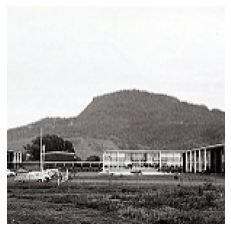

In [4]:
# Visualize
img = load_img(train_path + "buildings/0.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [5]:
# The images size in dataset.
image_shape = img_to_array(img)
print(image_shape.shape)

(150, 150, 3)


In [6]:
# Prepare the datasef for vgg16
train_data = ImageDataGenerator().flow_from_directory(train_path, target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_path, target_size = (224,224))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


## Visualization <a id ="1a"></a>
[Go Content](#cont)

In this chapter, I visualized a few images in the dataset.

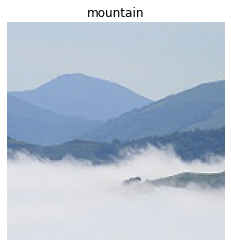

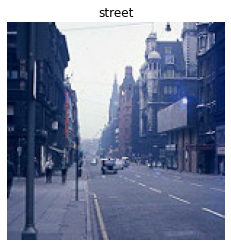

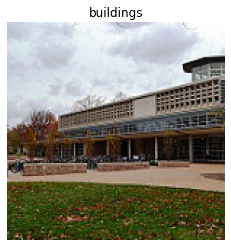

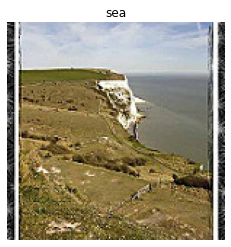

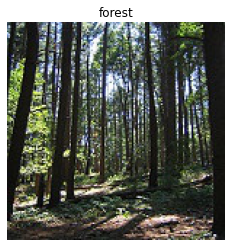

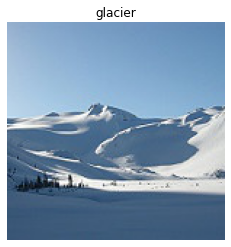

In [7]:
for i in os.listdir(train_path):
    for j in os.listdir(train_path + i):
        img = load_img(train_path + i + "/" + j)
        plt.imshow(img)
        plt.title(i)
        plt.axis("off")
        plt.show()
        break

# VGG16 <a id = "2"></a>
[Go Content](#cont)

**What is the VGG16?**

A convolutional neural network is also known as a ConvNet, which is a kind of artificial neural network. A convolutional neural network has an input layer, an output layer, and various hidden layers. VGG16 is a type of CNN (Convolutional Neural Network) that is considered to be one of the best computer vision models to date. The creators of this model evaluated the networks and increased the depth using an architecture with very small (3 × 3) convolution filters, which showed a significant improvement on the prior-art configurations. They pushed the depth to 16–19 weight layers making it approx — 138 trainable parameters.

If You want more information about the VGG16 model, [click here.](https://medium.com/p/7315defb5918)

## Create Model <a id = "2a"></a>
[Go Content](#cont)

In this chapter, I created the VGG16 model. At the same time, I made the Transfer Learning.
- Firstly, I imported the vgg16 model.
- Secondly, I created my model and add layers of vgg16 in my model. I didn't add last layer because I will created it separately.
- Thirtly, I closed the layers of vgg16 because I don't want to train those layers again, I just will use the weight and bias values of the layers.
- Endly, I created the last layer and compile of the model.

**What is the Transfer Learning?**

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.

It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.

If you want more information about the Transfer Learning, [click here.](https://machinelearningmastery.com/transfer-learning-for-deep-learning/)

In [8]:
# Import model
vgg16 = VGG16()

2022-09-13 16:34:59.428708: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


553476096/553467096 [==============================] - 3s 0us/step


In [9]:
# Layers of vgg16 
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
# layers of vgg16
vgg16_layer_list = vgg16.layers
for i in vgg16_layer_list:
    print(i)

In [11]:
# add the layers of vgg16 in my created model.
vgg16Model = Sequential()
for i in range(len(vgg16_layer_list)-1):
    vgg16Model.add(vgg16_layer_list[i])

In [12]:
# the final version of the model
vgg16Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [13]:
# Close the layers of vgg16
for layers in vgg16Model.layers:
    layers.trainable = False

In [14]:
# Last layer
vgg16Model.add(Dense(numberOfClass, activation = "softmax"))

In [15]:
# After I added last layer in created model.
vgg16Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [16]:
# I create compile part.
vgg16Model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

## Training Model <a id = "2b"></a>
[Go Content](#cont)

In this chapter, I am training with the model at the dataset, and after, I saved the weight of the model.

In [17]:
# Traning with model
batch_size = 32

hist_vgg16 = vgg16Model.fit_generator(train_data, 
                                      steps_per_epoch = 1600 // batch_size, 
                                      epochs = 10, 
                                      validation_data = test_data, 
                                      validation_steps = 800 // batch_size)

2022-09-13 16:35:06.425583: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
50/50 [==============================] - 612s 12s/step - loss: 0.6766 - accuracy: 0.7894 - val_loss: 0.4590 - val_accuracy: 0.8462
Epoch 2/10
50/50 [==============================] - 603s 12s/step - loss: 0.4432 - accuracy: 0.8519 - val_loss: 0.3266 - val_accuracy: 0.8800
Epoch 3/10
50/50 [==============================] - 603s 12s/step - loss: 0.4356 - accuracy: 0.8650 - val_loss: 0.4074 - val_accuracy: 0.8750
Epoch 4/10
50/50 [==============================] - 606s 12s/step - loss: 0.3649 - accuracy: 0.8737 - val_loss: 0.4193 - val_accuracy: 0.8587
Epoch 5/10
50/50 [==============================] - 601s 12s/step - loss: 0.4144 - accuracy: 0.8650 - val_loss: 0.4218 - val_accuracy: 0.8612
Epoch 6/10
50/50 [==============================] - 603s 12s/step - loss: 0.4202 - accuracy: 0.8662 - val_loss: 0.4555 - val_accuracy: 0.8512
Epoch 7/10
50/50 [==============================] - 602s 12s/step - loss: 0.3231 - accuracy: 0.8913 - val_loss: 0.4210 - val_accuracy: 0.8775
Epoch 

In [18]:
# Save the weights of model
vgg16Model.save_weights("deneme.h5")

## Visualize The Result Of Model <a id = "2c"></a>
[Go Content](#cont)

In this chapter, I visualized the result of the vgg16 model.

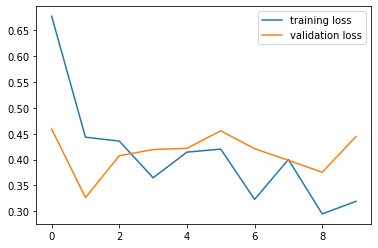

In [19]:
# Loss and Validation Loss
plt.plot(hist_vgg16.history["loss"], label = "training loss")
plt.plot(hist_vgg16.history["val_loss"], label = "validation loss")
plt.legend()
plt.show()

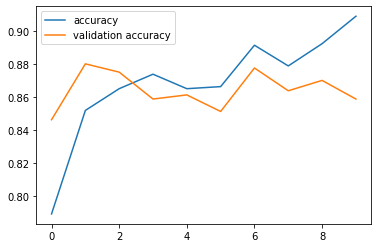

In [20]:
# Accuracy and Validation Accuracy
plt.plot(hist_vgg16.history["accuracy"], label = "accuracy")
plt.plot(hist_vgg16.history["val_accuracy"], label = "validation accuracy")
plt.legend()
plt.show()

## Save And Load Result <a id = "2d"></a>
[Go Content](#cont)

In this chapter, I registered the results of the model and after I read the result I saved again, I visualized its. I visualized it to see if I recorded it correctly.

### Save Result <a id = "2d1"></a>
[Go Content](#cont)

In this chapter, I registered the result of the vgg16 model.

In [21]:
import json, codecs
with open("deneme.json","w") as f:
    json.dump(hist_vgg16.history, f)

### Load Result <a id = "2d2"></a>
[Go Content](#cont)

In this chaper, I read the result I saved again, I visualized its.

In [22]:
with codecs.open("./deneme.json","r", encoding = "utf-8") as f:
    load_result = json.loads(f.read())

In [23]:
load_result

{'loss': [0.6765779256820679,
  0.443220317363739,
  0.4356480538845062,
  0.3648701608181,
  0.4143998324871063,
  0.4201752841472626,
  0.3231465220451355,
  0.40007904171943665,
  0.29516902565956116,
  0.3194922208786011],
 'accuracy': [0.7893750071525574,
  0.8518750071525574,
  0.8650000095367432,
  0.8737499713897705,
  0.8650000095367432,
  0.8662499785423279,
  0.8912500143051147,
  0.8787500262260437,
  0.8921815752983093,
  0.9087499976158142],
 'val_loss': [0.45904117822647095,
  0.32658064365386963,
  0.40743598341941833,
  0.4193015992641449,
  0.421784371137619,
  0.45553913712501526,
  0.42103099822998047,
  0.3985721170902252,
  0.37547627091407776,
  0.4444907307624817],
 'val_accuracy': [0.8462499976158142,
  0.8799999952316284,
  0.875,
  0.8587499856948853,
  0.8612499833106995,
  0.8512499928474426,
  0.8774999976158142,
  0.8637499809265137,
  0.8700000047683716,
  0.8587499856948853]}

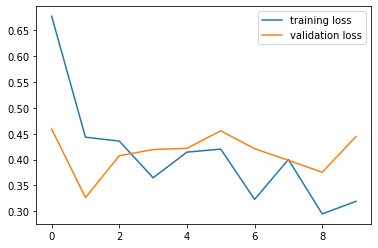

In [24]:
# Loss And Validation Loss
plt.plot(load_result["loss"], label = "training loss")
plt.plot(load_result["val_loss"], label = "validation loss")
plt.legend()
plt.show()

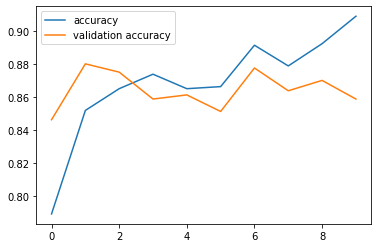

In [25]:
# Accuracy And Validation Accuracy
plt.plot(load_result["accuracy"], label = "accuracy")
plt.plot(load_result["val_accuracy"], label = "validation accuracy")
plt.legend()
plt.show()

# VGG19 <a id = "3"></a>
[Go Content](#cont)

**What is the VGG19?**

The concept of the VGG19 model (also VGGNet-19) is the same as the VGG16 except that it supports 19 layers. The “16” and “19” stand for the number of weight layers in the model (convolutional layers). This means that VGG19 has three more convolutional layers than VGG16.

If you want more information of VGG19 model, [click here.](https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/)

## Create Model <a id = "3a"></a>
[Go Content](#cont)

In this chapter, I created the VGG19 model. At the same time, I made the Transfer Learning.
- Firstly, I imported the vgg19 model.
- Secondly, I created my model and add layers of vgg16 in my model. I didn't add last layer because I will created it separately.
- Thirtly, I closed the layers of vgg16 because I don't want to train those layers again, I just will use the weight and bias values of the layers.
- Endly, I created the last layer and compile of the model.

If you want short information on Transfer Learning, [click here.](#2a)

In [26]:
# Import VGG19 model
vgg19 = VGG19()

574726144/574710816 [==============================] - 12s 0us/step


In [27]:
# Layers of vgg19
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [28]:
# Layers of vgg19 
vgg19_layer_list = vgg19.layers
for i in vgg19_layer_list:
    print(i)

In [29]:
# add the layers of vgg16 in my created model.
vgg19Model = Sequential()
for i in range(len(vgg19_layer_list)-1):
    vgg19Model.add(vgg19_layer_list[i])

In [30]:
# Finish version of my created model.
vgg19Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [31]:
# Close the layers of vgg16
for layers in vgg19Model.layers:
    layers.trainable = False

In [32]:
# Last layer
vgg19Model.add(Dense(numberOfClass, activation = "softmax"))

In [33]:
# the final version of the model
vgg19Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [34]:
# I create compile part.
vgg19Model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

## Train Model <a id = "3b"></a>
[Go Content](#cont)

In this chapter, I am training with the model at the dataset, and after, I saved the weight of the model.

In [35]:
# Training with my created model
hisy_vgg19 = vgg19Model.fit_generator(train_data,
                               steps_per_epoch = 1600 // batch_size,
                               epochs = 10,
                               validation_data = test_data,
                               validation_steps = 800 // batch_size)

Epoch 1/10
50/50 [==============================] - 763s 15s/step - loss: 0.6447 - accuracy: 0.7711 - val_loss: 0.4504 - val_accuracy: 0.8413
Epoch 2/10
50/50 [==============================] - 760s 15s/step - loss: 0.3838 - accuracy: 0.8651 - val_loss: 0.4337 - val_accuracy: 0.8525
Epoch 3/10
50/50 [==============================] - 762s 15s/step - loss: 0.3784 - accuracy: 0.8712 - val_loss: 0.4437 - val_accuracy: 0.8700
Epoch 4/10
50/50 [==============================] - 766s 15s/step - loss: 0.3945 - accuracy: 0.8687 - val_loss: 0.3935 - val_accuracy: 0.8788
Epoch 5/10
50/50 [==============================] - 767s 15s/step - loss: 0.3626 - accuracy: 0.8806 - val_loss: 0.6679 - val_accuracy: 0.7950
Epoch 6/10
50/50 [==============================] - 761s 15s/step - loss: 0.3540 - accuracy: 0.8944 - val_loss: 0.5097 - val_accuracy: 0.8413
Epoch 7/10
50/50 [==============================] - 761s 15s/step - loss: 0.3338 - accuracy: 0.8919 - val_loss: 0.3690 - val_accuracy: 0.8863
Epoch 

## Visualize The Results Of Model <a id = "3c"></a>
[Go Content](#cont)

In this chapter, I visualized the result of the vgg19 model.

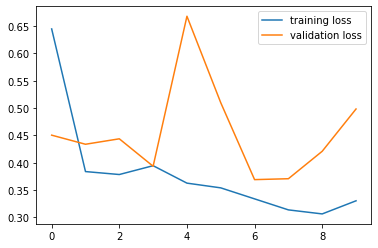

In [36]:
# Loss And Validation Loss
plt.plot(hisy_vgg19.history["loss"], label = "training loss")
plt.plot(hisy_vgg19.history["val_loss"], label = "validation loss")
plt.legend()
plt.show()

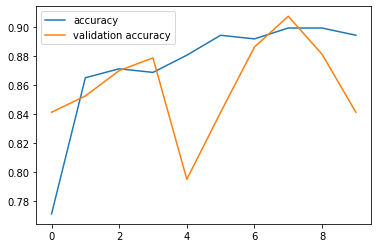

In [37]:
# Accuracy And Validation Accuracy
plt.plot(hisy_vgg19.history["accuracy"], label = "accuracy")
plt.plot(hisy_vgg19.history["val_accuracy"], label = "validation accuracy")
plt.legend()
plt.show()

# CONCLUSION <a id = "4"></a>
---
[Go Content](#cont)

I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.